In [1]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
%matplotlib inline
import matplotlib.pyplot as plt

ld=pd.read_csv('Subway_Mat.csv')

In [2]:
store_name=list(ld['Store_name'].unique())
store_name

['Subway wakad',
 'Subway Qubix',
 'Subway Blueridge',
 'Subway Phoenix',
 'Subway Balewadi',
 'Subway Highway',
 'Subway TCS',
 'Cognizant subway',
 'Subway Cognizant']

In [3]:
ld

,Unnamed: 0,Invoice_num,Cust_id,Store_name,Order_status,Delivery_receipt,Delivery_month,Delivery_day,Order_ts,Unnamed: 9,...,capsicum_Qty,tomato_Price,tomato_Qty,onion_Price,onion_Qty,Garlic_Price,Garlic_Qty,Baby_Price,Baby_Qty,Amount
0,0,25244,504,Subway wakad,Delivered,True,1,10,2019-01-10,NaN,...,6.0,26.0,8.0,21.0,8.0,NaN,NaN,NaN,NaN,730
1,1,25268,504,Subway wakad,Delivered,True,2,10,2019-02-10,NaN,...,4.0,26.0,4.0,21.0,2.0,NaN,NaN,NaN,NaN,382
2,2,25318,504,Subway wakad,Delivered,True,4,10,2019-04-10,NaN,...,10.0,26.0,10.0,21.0,6.0,NaN,NaN,NaN,NaN,976
3,3,25343,504,Subway wakad,Delivered,True,6,10,2019-06-10,NaN,...,7.0,26.0,8.0,21.0,8.0,NaN,NaN,NaN,NaN,810
4,4,25367,504,Subway wakad,Processing,NaN,7,10,2019-07-10,NaN,...,5.0,NaN,NaN,21.0,5.0,NaN,NaN,NaN,NaN,295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,26345,185,Cognizant subway,Dispatched,NaN,11,28,2019-11-27,NaN,...,10.0,26.0,5.0,21.0,10.0,NaN,NaN,NaN,NaN,720
204,204,26353,179,Subway Blueridge,Dispatched,NaN,11,28,2019-11-28,NaN,...,10.0,26.0,5.0,21.0,10.0,NaN,NaN,NaN,NaN,888
205,205,26354,344,Subway Qubix,Dispatched,NaN,11,28,2019-11-28,NaN,...,5.0,26.0,5.0,21.0,5.0,NaN,NaN,NaN,NaN,530
206,206,26365,359,Subway Highway,Dispatched,NaN,11,29,2019-11-29,NaN,...,10.0,26.0,15.0,21.0,10.0,NaN,NaN,NaN,NaN,1190


In [5]:
store_count=list(ld['Store_name'].value_counts())
store_count

[40, 36, 28, 27, 25, 22, 21, 8, 1]

In [6]:
ld=ld.drop(['Unnamed: 0','Unnamed: 9'],axis=1)

In [7]:
ld2=ld.drop(['Unnamed: 0','Unnamed: 9'],axis=1)

KeyError: "['Unnamed: 0' 'Unnamed: 9'] not found in axis"

In [11]:
ld2=ld

In [12]:
ld2.corr

<bound method DataFrame.corr of      Invoice_num  Cust_id        Store_name Order_status Delivery_receipt  \
0          25244      504      Subway wakad    Delivered             True   
1          25268      504      Subway wakad    Delivered             True   
2          25318      504      Subway wakad    Delivered             True   
3          25343      504      Subway wakad    Delivered             True   
4          25367      504      Subway wakad   Processing              NaN   
..           ...      ...               ...          ...              ...   
203        26345      185  Cognizant subway   Dispatched              NaN   
204        26353      179  Subway Blueridge   Dispatched              NaN   
205        26354      344      Subway Qubix   Dispatched              NaN   
206        26365      359    Subway Highway   Dispatched              NaN   
207        26366      179  Subway Blueridge   Dispatched              NaN   

     Delivery_month  Delivery_day    Order_

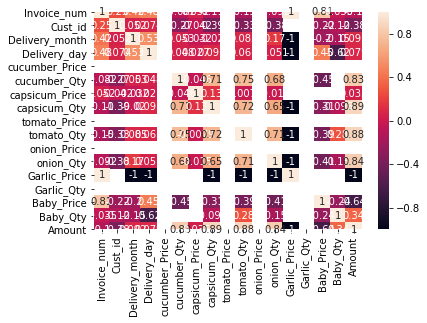

In [13]:
ld1 = ld2.corr()

sns.heatmap(ld1,annot=True)

In [ ]:
plt.plot('Store_name', 'Delivery_day', data=ld)
plt.xlabel('Store Name')
plt.ylabel('Delivery Day')


plt.show()

In [ ]:
plt.scatter('Store_name', 'Delivery_day', data=ld)
plt.xlabel('Store Name')
plt.ylabel('Delivery Day')


plt.show()

In [ ]:
names=ld['Store_name']
values=ld['Amount']

plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

In [ ]:
x=ld['Delivery_day']
y=ld['cucumber_Qty']

line, = plt.bar(x, y)
line.set_antialiased(False)

In [ ]:
x=ld['Order_status']
y=ld['Amount']

lines = plt.plot(x, y)
# use keyword args
plt.setp(lines, color='r', linewidth=5.0)
# or MATLAB style string value pairs
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

In [ ]:
ld2.columns

In [ ]:
plt.plot([ 'Store_name', 'Order_status'])

plt.subplot(211)
plt.plot(range(12))
plt.subplot(212, facecolor='g') # creates 2nd subplot with yellow background
plt.plot(range(12))

In [ ]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(3,3)
import numpy as np
x= ld['Amount']
a[0][0].plot(x,ld['cucumber_Price'])
a[0][0].set_title('cu')
a[0][1].plot(x,ld['capsicum_Price'])
a[0][1].set_title('cap')
a[0][2].plot(x,ld['onion_Price'])
a[0][2].set_title('on')
a[1][1].plot(x,ld['tomato_Price'])
a[1][1].set_title('to')
a[1][2].plot(x,ld['Garlic_Price'])
a[1][2].set_title('ga')
a[1][3].plot(x,ld['Baby_Price'])
a[1][3].set_title('baby')
plt.show()

In [ ]:
amount=list(ld['Amount'])
amount
store=list(ld['Store_name'])
store

In [ ]:
cucumber=list(ld['cucumber_Price'])
cucumber

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


ax.bar(store,amount)
plt.show()

In [ ]:
store_name

In [ ]:
store_count

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(store_name,labels = store_count,autopct='%1.2f%%')
plt.show()

In [ ]:
cuc=list(ld['cucumber_Qty'])
cuc
cap=list(ld['capsicum_Qty'])
cap
on=list(ld['onion_Qty'])
on
tom=list(ld['tomato_Qty'])
tom
gar=list(ld['Garlic_Qty'])
gar
bab=list(ld['Baby_Qty'])
bab

Qty_range = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0]

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(Qty_range, cuc, color='r')
ax.scatter(Qty_range, cap, color='b')
ax.scatter(Qty_range, on, color='g')
ax.scatter(Qty_range, tom, color='y')
ax.scatter(Qty_range, gar, color='o')
ax.scatter(Qty_range, bab, color='c')

ax.set_xlabel('Qty Range')
ax.set_ylabel('Items')
ax.set_title('scatter plot')
plt.show()

In [ ]:
cuc=list(ld['cucumber_Qty'])
#cuc1= [cuc1 for cuc1 in cuc if str(cuc) != 'nan']

cuc1

In [ ]:
cuc1=ld['cucumber_Qty'].dropna().unique().tolist()
cuc1
cap1=ld['capsicum_Qty'].dropna().unique().tolist()
cap1
on1=ld['onion_Qty'].dropna().unique().tolist()
on1
tom1=ld['tomato_Qty'].dropna().unique().tolist()
tom1
gar1=ld['Garlic_Qty'].dropna().unique().tolist()
gar1
bab1=ld['Baby_Qty'].dropna().unique().tolist()
bab1

Qty_range = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0]

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(Qty_range, cuc1, color='r')
ax.scatter(Qty_range, cap1, color='b')
ax.scatter(Qty_range, on1, color='g')
ax.scatter(Qty_range, tom1, color='y')
ax.scatter(Qty_range, gar1, color='o')
ax.scatter(Qty_range, bab1, color='c')

ax.set_xlabel('Qty Range')
ax.set_ylabel('Items')
ax.set_title('scatter plot')
plt.show()

In [ ]:
cuc2=ld['cucumber_Qty'].dropna().tolist()
cuc2

In [ ]:
ld

TypeError: unsupported operand type(s) for /: 'str' and 'int'

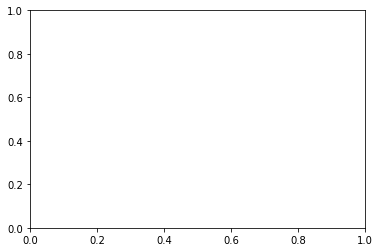

In [8]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

sb.distplot(ld['Store_name'],hist=False)
plt.show()

C:\Users\somya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\somya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


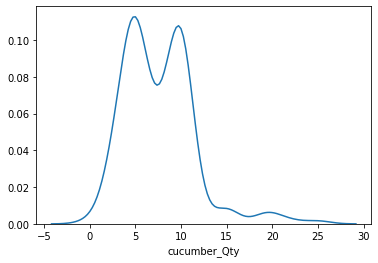

In [15]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df = sb.load_dataset('iris')
sb.distplot(ld['cucumber_Qty'],hist=False)
plt.show()

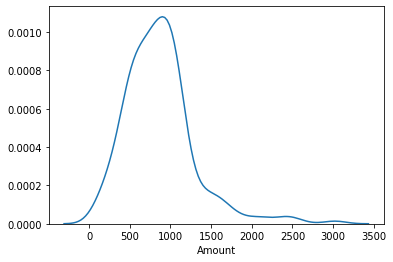

In [16]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

sb.distplot(ld['Amount'],hist=False)
plt.show()

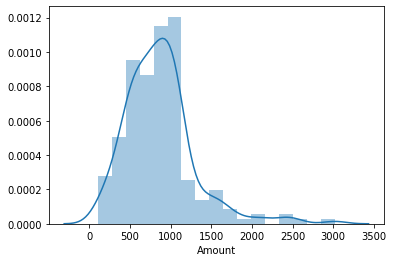

In [17]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

sb.distplot(ld['Amount'])
plt.show()

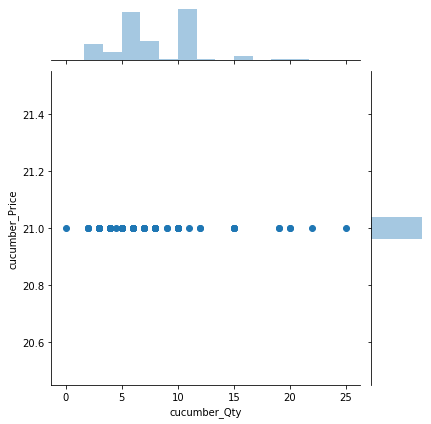

In [18]:
sb.jointplot(x = 'cucumber_Qty',y = 'cucumber_Price',data = ld)
plt.show()

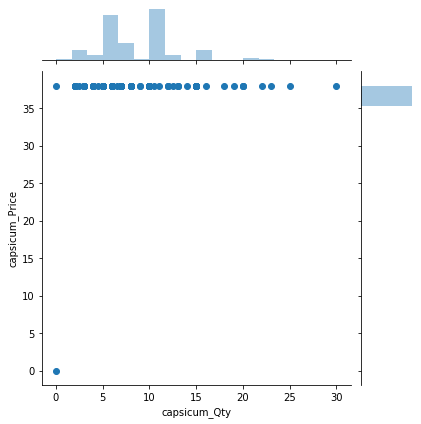

In [19]:
sb.jointplot(x = 'capsicum_Qty',y = 'capsicum_Price',data = ld)
plt.show()

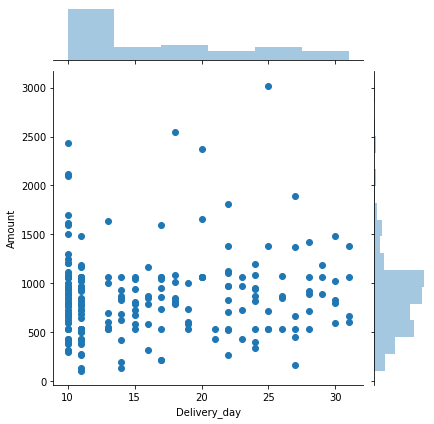

In [21]:
sb.jointplot(x = 'Delivery_day',y = 'Amount',data = ld)
plt.show()

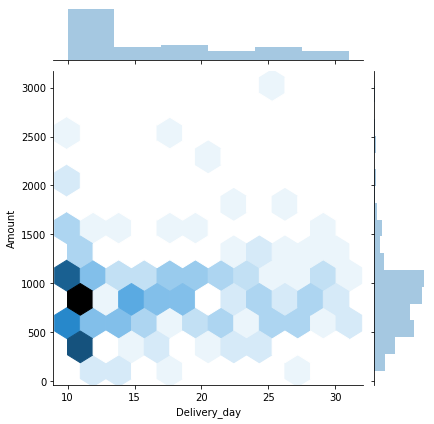

In [22]:
sb.jointplot(x = 'Delivery_day',y = 'Amount',data = ld,kind = 'hex')
plt.show()

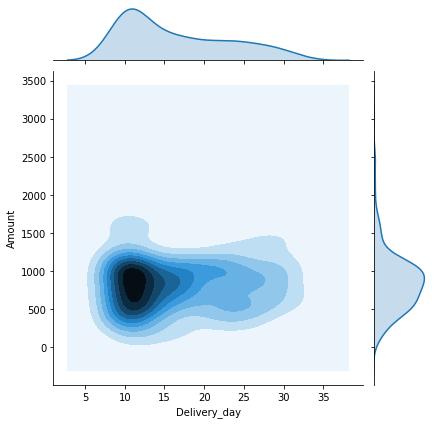

In [23]:
sb.jointplot(x = 'Delivery_day',y = 'Amount',data = ld,kind = 'kde')
plt.show()

ZeroDivisionError: 0.0 cannot be raised to a negative power

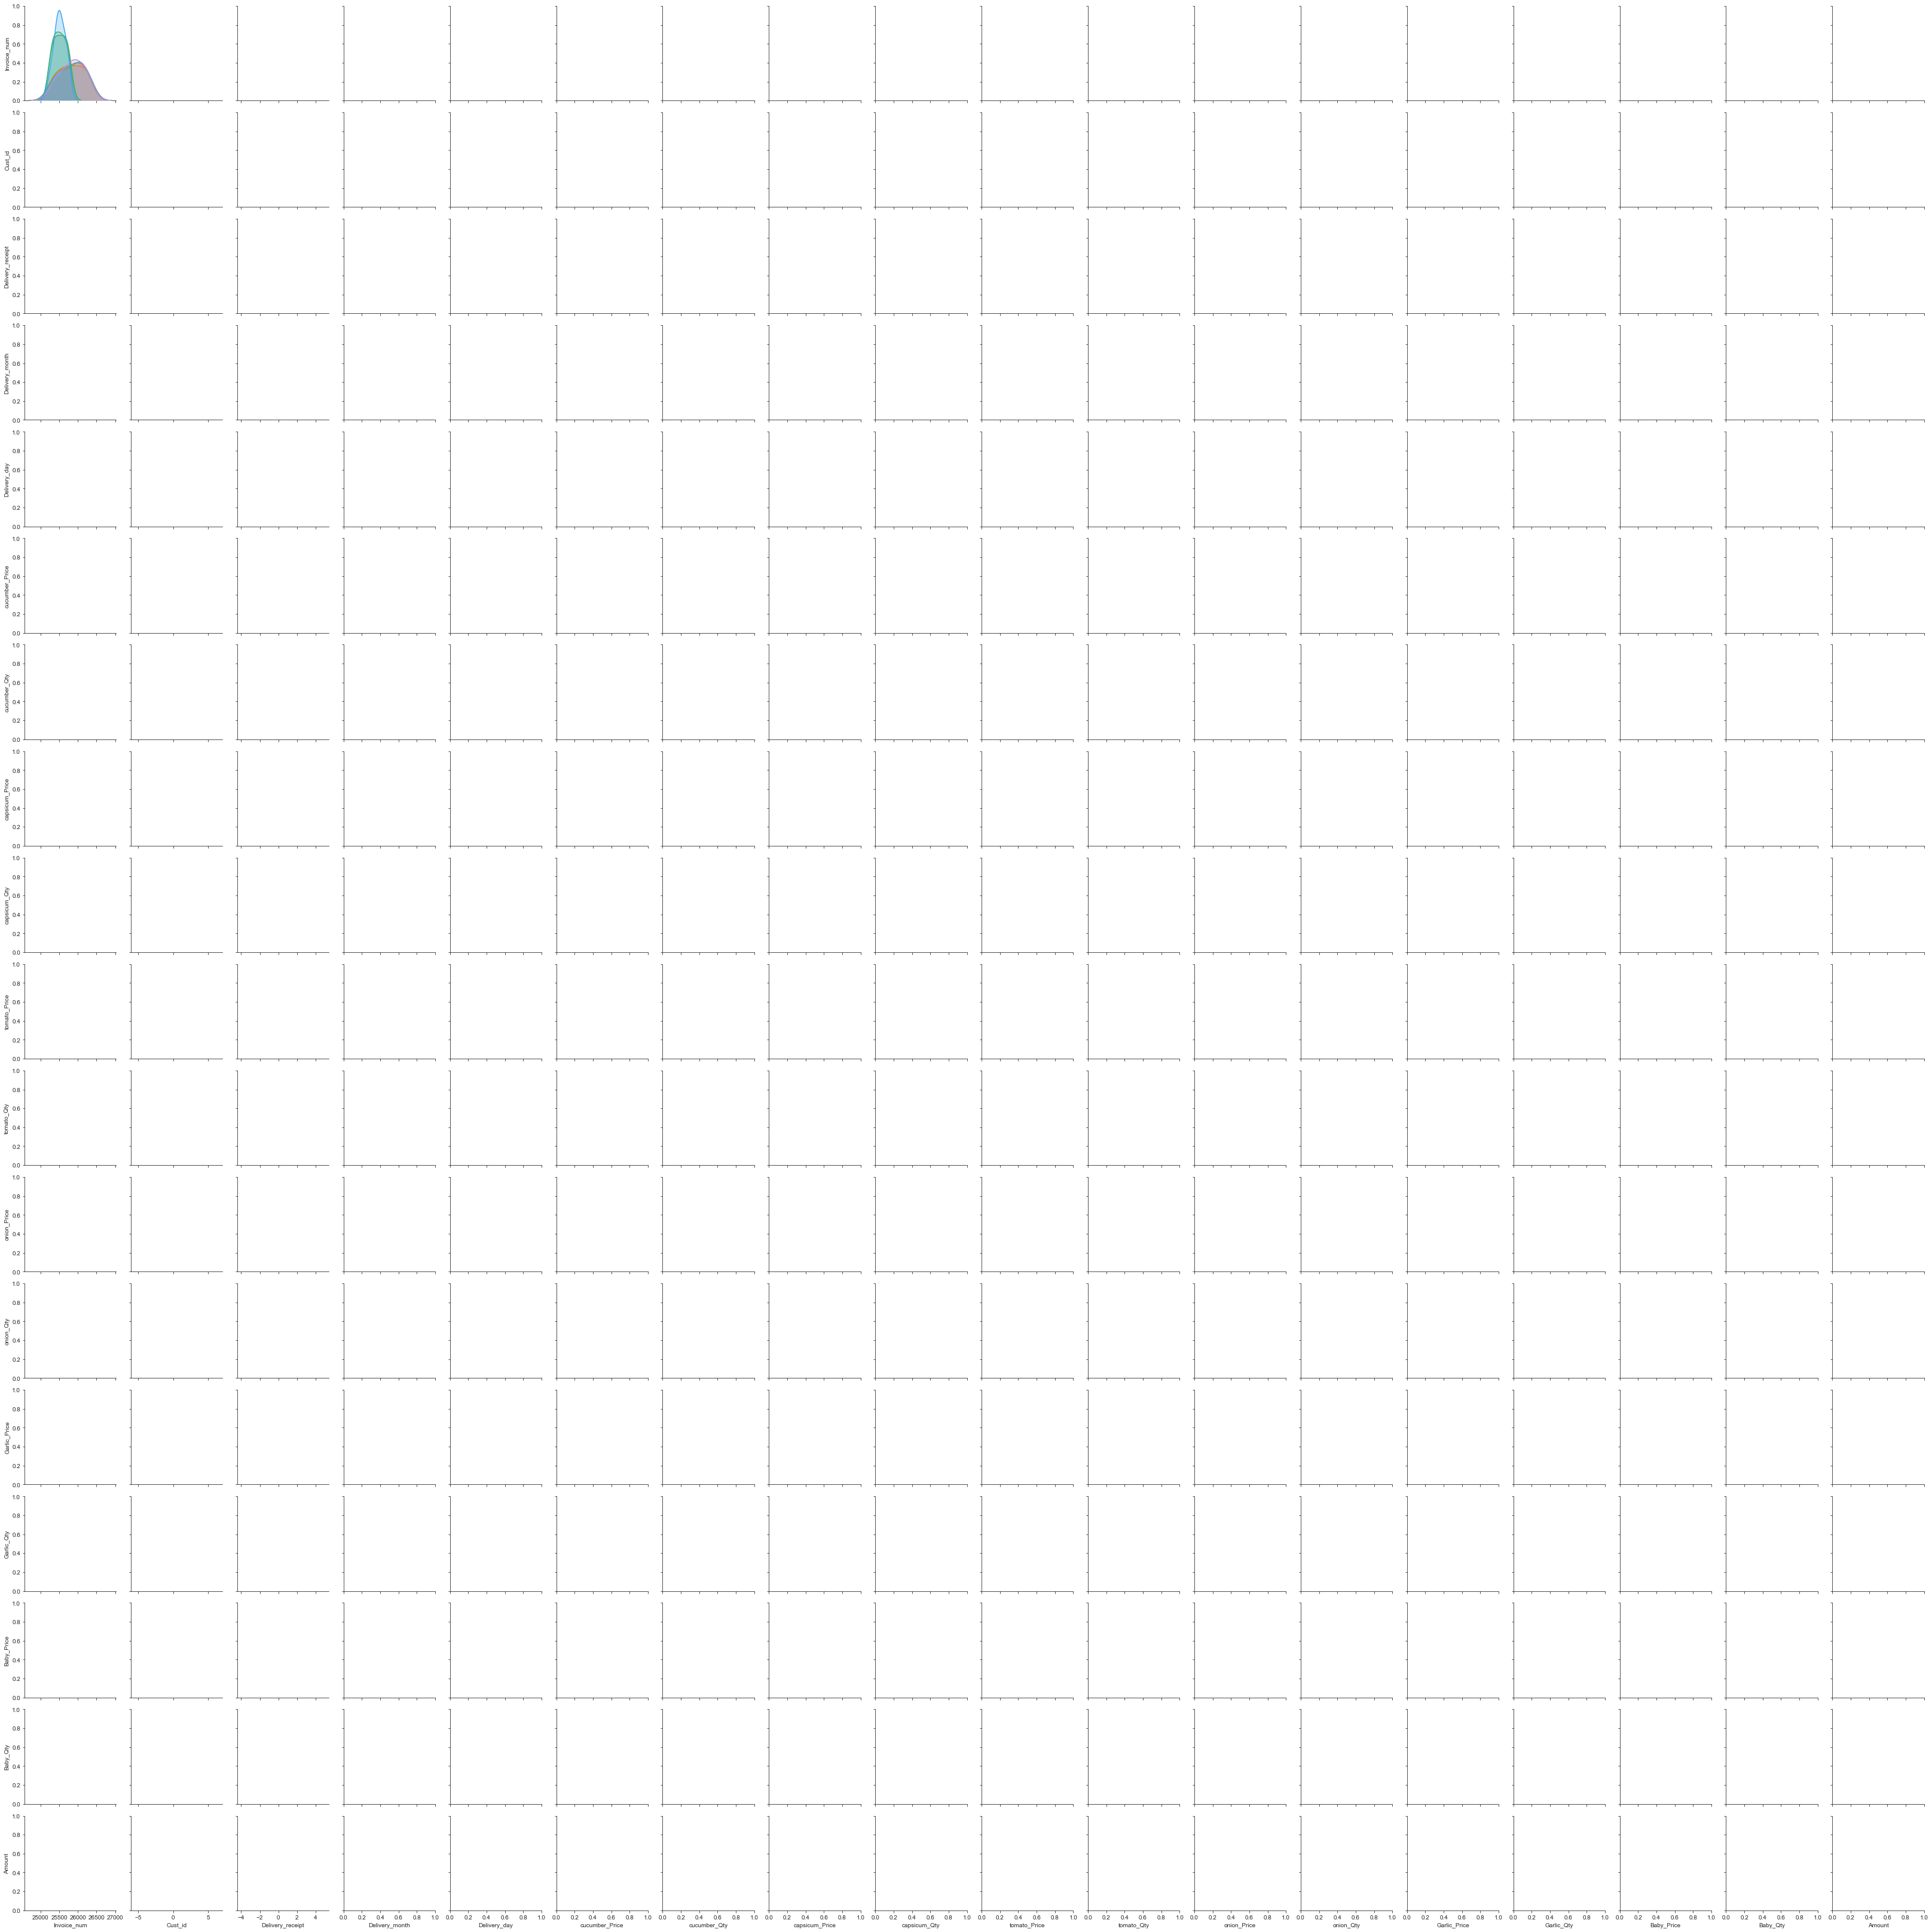

In [25]:
sb.set_style("ticks")
sb.pairplot(ld,hue = 'Store_name',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

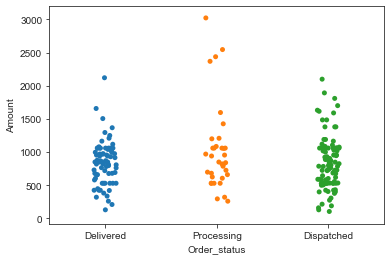

In [28]:
sb.stripplot(x = "Order_status", y = "Amount", data = ld)
plt.show()

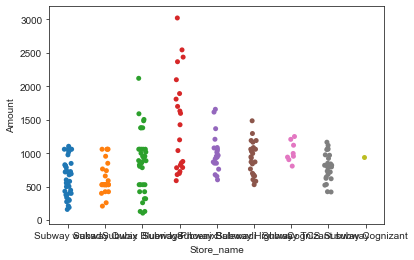

In [29]:
sb.stripplot(x = "Store_name", y = "Amount", data = ld)
plt.show()

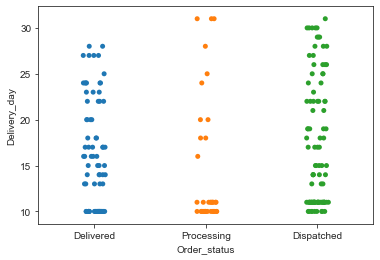

In [30]:
sb.stripplot(x = "Order_status", y = "Delivery_day", data = ld)
plt.show()

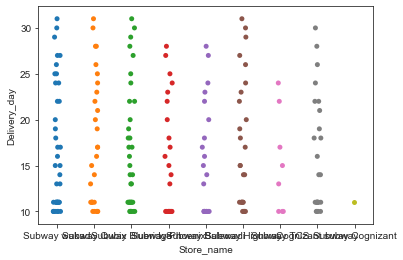

In [31]:
sb.stripplot(x = "Store_name", y = "Delivery_day", data = ld)
plt.show()

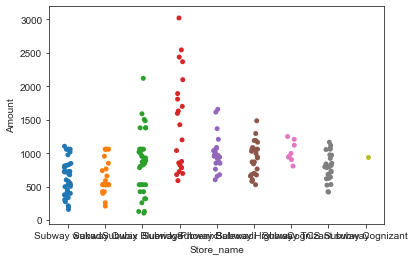

In [35]:
sb.stripplot(x = "Store_name", y = "Amount", data = ld, jitter = True)
plt.show()

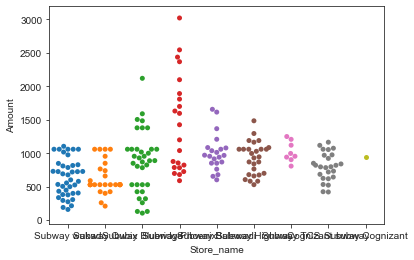

In [36]:
sb.swarmplot(x = "Store_name", y = "Amount", data = ld)
plt.show()

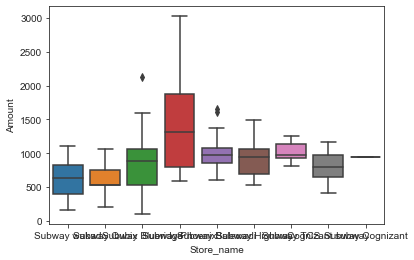

In [37]:
sb.boxplot(x = "Store_name", y = "Amount", data = ld)
plt.show()

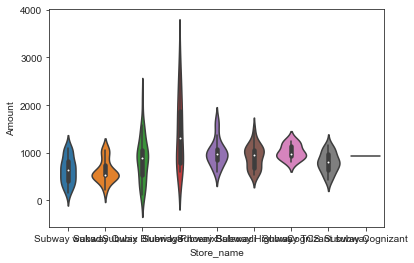

In [38]:
sb.violinplot(x = "Store_name", y = "Amount", data = ld)
plt.show()

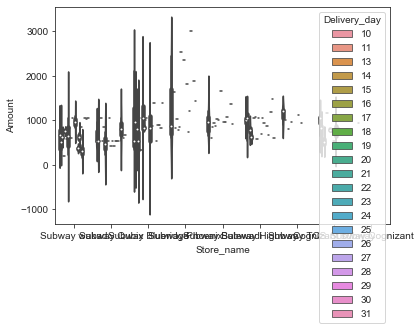

In [40]:
sb.violinplot(x = "Store_name", y = "Amount",hue = 'Delivery_day', data = ld)
plt.show()

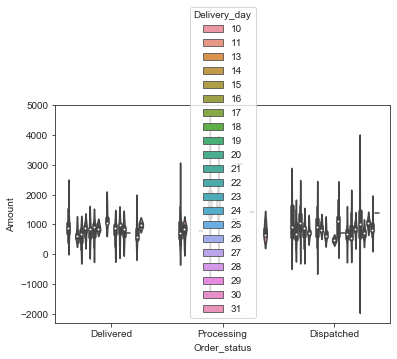

In [42]:
sb.violinplot(x = "Order_status", y = "Amount",hue = 'Delivery_day', data = ld)
plt.show()

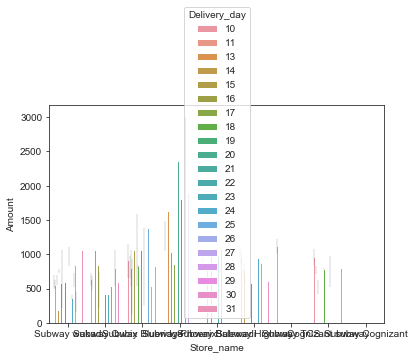

In [57]:
sb.barplot(x = "Store_name", y = "Amount", hue = "Delivery_day", data = ld,errwidth=0.2,ci=68)
plt.show()

AttributeError: 'Rectangle' object has no property 'seed'

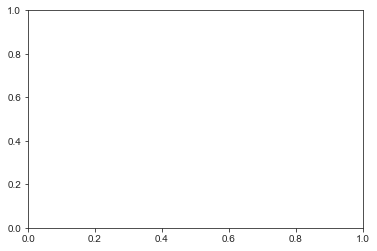

In [56]:
sb.barplot(x = "Store_name", y = "Amount", hue = "Delivery_day", data = ld,errwidth=0.2,seed=2)
plt.show()

C:\Users\somya\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\somya\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


TypeError: bar() got multiple values for argument 'width'

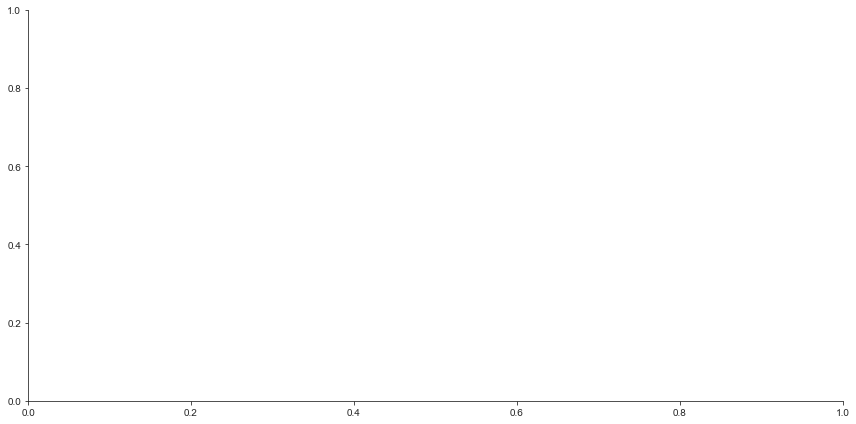

In [58]:
sb.factorplot(x = "Store_name", y = "Amount", hue = "Delivery_day", data = ld,size=6,aspect=2,kind='bar',width=10)
plt.show()

<BarContainer object of 208 artists>

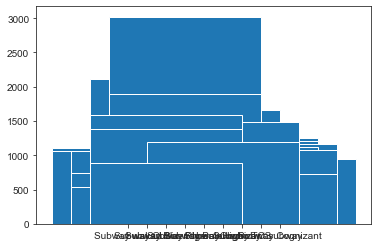

In [60]:
import pylab as pt
pt.bar(ld.Store_name,ld.Amount,8)

In [63]:
sb.factorplot("Delivered", col = "Store_name", col_wrap = 3,data = ld,kind = "count")
plt.show()

ValueError: Could not interpret input 'Delivered'

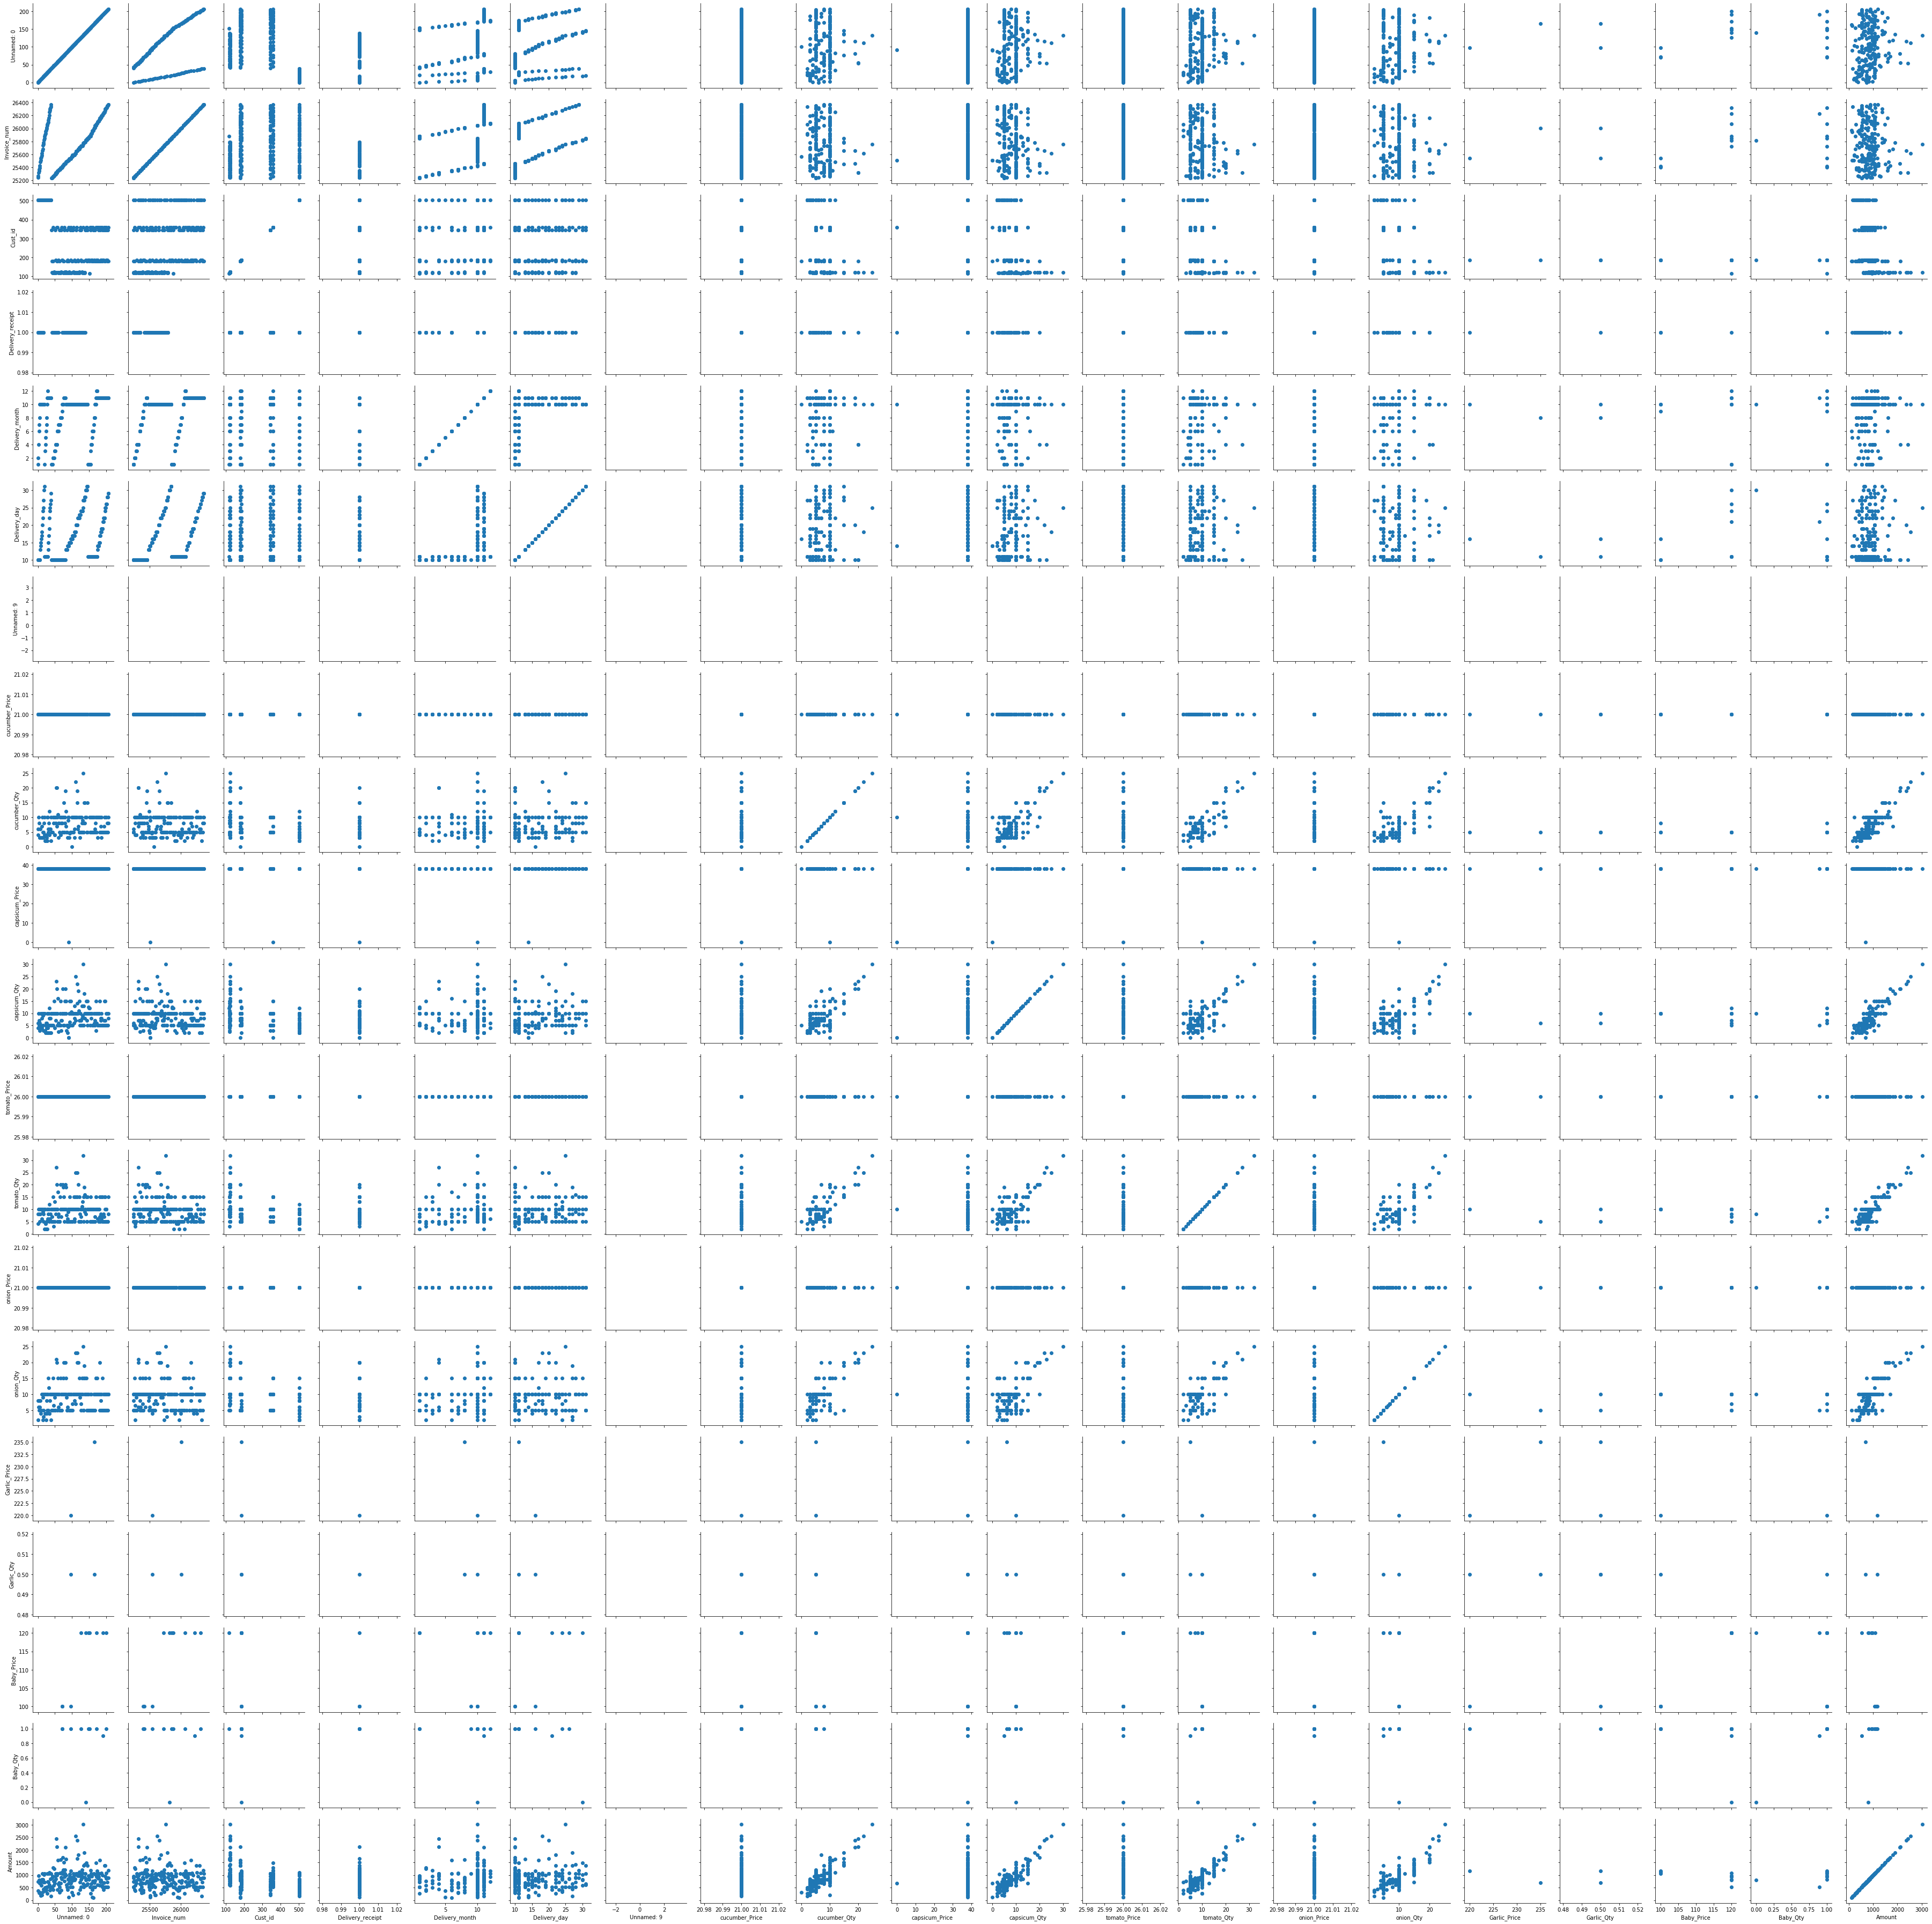

In [4]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

g = sb.PairGrid(ld)
g.map(plt.scatter);
plt.show()

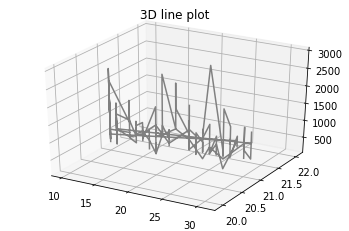

In [5]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
z = ld['Amount']
x = ld['Delivery_day']
y = ld['cucumber_Price']
ax.plot3D(x, y, z, 'gray')
ax.set_title('3D line plot')
plt.show()

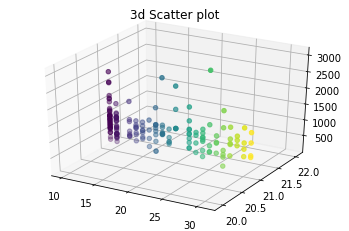

In [6]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
z = ld['Amount']
x = ld['Delivery_day']
y = ld['cucumber_Price']
c = x + y
ax.scatter(x, y, z, c=c)
ax.set_title('3d Scatter plot')
plt.show()

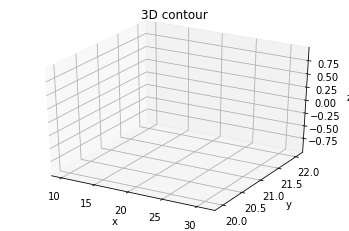

In [7]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
   return np.sin(np.sqrt(x ** 2 + y ** 2))
	
x = ld['Delivery_day']
y = ld['cucumber_Price']
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')
plt.show()
